In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from scipy import stats
import seaborn as sns
sys.path.append('/Users/charl/OneDrive/Documents/__water/floOoo/code/py/')
import floOoo_neurofusion_functions as flo


In [2]:
plt.style.use(plt.style.available[0])

In [10]:
def reload_functions():
    import importlib
    import floOoo_neurofusion_functions as flo
    importlib.reload(flo)
    

In [8]:
# load defaults
rootDir = '/Users/charl/OneDrive/Documents/__water/floOoo/code/data/neurofusion/eeg-restingstate/'

sample_rate, channels, analysisDir_temp = flo.load_defaults() # fix - move this within class
nChannels = len(channels)

chColors = {}
for channel, color in zip(sorted(channels), sns.color_palette('Set1', nChannels)):
    chColors[channel] = color
    
events = flo.load_events(rootDir)

In [11]:
reload_functions()
folder, filenames = flo.get_filenames(rootDir)

In [12]:
# load defaults
rootDir = '/Users/charl/OneDrive/Documents/__water/floOoo/code/data/neurofusion/eeg-restingstate/'
sample_rate, channels, analysisDir_temp = flo.get_defaults() # fix - move this within class

AttributeError: module 'floOoo_neurofusion_functions' has no attribute 'get_defaults'

In [13]:
rootDir

'/Users/charl/OneDrive/Documents/__water/floOoo/code/data/neurofusion/eeg-restingstate/'

# Class play

In [134]:
def load_chData(folder, filename):
        data = pd.read_csv(folder+filename)
        chData = np.row_stack([data[channel] for channel in channels])
        return chData

def get_maxSDs(chData):
    maxSDs = np.abs(stats.zscore(chData, axis=1)).max(axis=0)
    return maxSDs
    

# Data cleaning

In [125]:
zThresh = 20
color_zThresh = 'r'
nHistBins = 100


nFiles = len(filenames)

w_trace, w_hist = 18, 6
h = 5
facecolor = None
wTot = w_trace + w_hist
hTot = h * nFiles


plt.figure(figsize=(wTot, hTot))
grid = plt.GridSpec(hTot, wTot, hspace=1.5, wspace=0.5)



currH = 0
plt.figure(figsize=(20, nFiles*5))
for fi, filename in enumerate(filenames):
    currW = 0
    plt.subplot(grid[currH:(currH+h), currW:(currW+w_trace)], facecolor=facecolor)
    plt.yticks(fontsize=14)
    flo.plot_title(filename.split('_')[1])

    # @@@
    chData = load_chData(folder, filename)
    maxSDs = get_max_SDs(chData)

    
    plt.plot(maxSDs)
    plt.hlines(zThresh, 0, len(maxSDs), linestyles='--', color=color_zThresh, lw=2, alpha=0.5)
    currW += w_trace

    plt.subplot(grid[currH:(currH+h), currW:(currW+w_hist)], facecolor=facecolor)

    edges = np.linspace(0, np.ceil(maxSDs.max()), nHistBins+1)
    cens, counts, _ = flo.get_hist(maxSDs, edges, norm=True)
    x, y = flo.get_xy_4_histFill(cens, counts)
    plt.plot(x, y)
    plt.fill_between(x, np.zeros_like(x), y, alpha=0.4)
    plt.vlines(zThresh, 0, counts.max(), linestyles='--', color=color_zThresh, lw=2, alpha=0.5)
    plt.yscale('log')
    
    currH += h
    
flo.save_image('jjmaxSDs')


<Figure size 2400x14000 with 0 Axes>

In [142]:
# explore higher zscores

In [127]:
filename = filenames[0]

In [135]:
chData = load_chData(folder, filename)
maxSDs = get_maxSDs(chData)

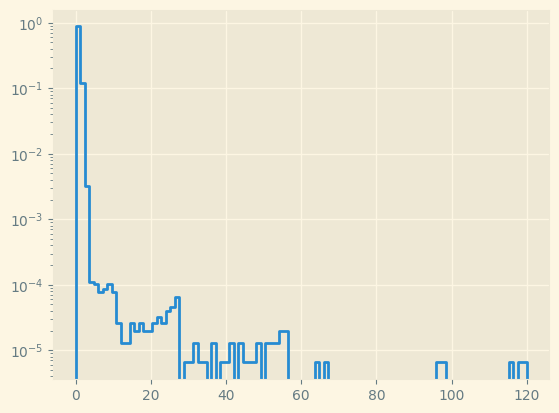

In [141]:
edges = np.linspace(0, np.ceil(maxSDs.max()), nHistBins+1)
cens, counts, _ = flo.get_hist(maxSDs, edges, norm=True)
x, y = flo.get_xy_4_histFill(cens, counts)
plt.plot(x, y)
plt.yscale('log')

In [162]:
zThreshs = np.linspace(0, np.ceil(maxSDs.max()), nHistBins+1)


y = []

for zThresh in zThreshs:
    bouts = flo.get_boutWindows(maxSDs < zThresh)
    if not len(bouts):
        y.append(np.nan)
    else:
        y.append(np.median(np.subtract(bouts[:, 1], bouts[:, 0]))/sample_rate)
y = np.array(y)

#maxSDs, zThresh

IndexError: list index out of range

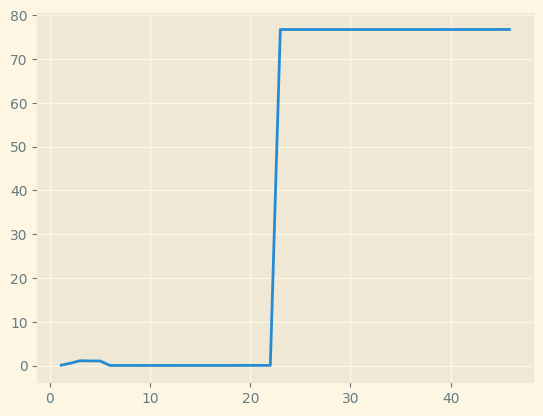

In [163]:
plt.plot(y)

In [122]:
os.chdir(analysisDir_temp)

In [123]:
reload_functions()

C:\Users\charl\AppData\Local\Temp\ipykernel_22104\1567541902.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [77]:
reload_functions()

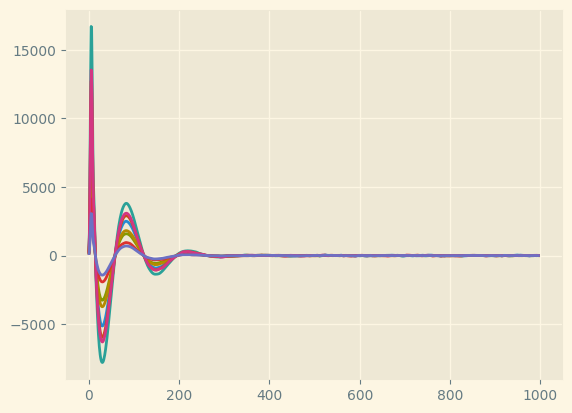

In [59]:
for channel in channels:
    plt.plot(chData[channel][:1000])

In [ ]:
chData[channel]

In [164]:
window = [20, 40]
maxSDs, wind

array([ 2.40995905, 11.50231432, 32.96988586, ...,  0.54520932,
        0.80909594,  0.95817265])

In [12]:
repo_id = 'neurofusion/eeg-restingstate'
repo_type = 'dataset'

In [10]:
download = False
if download:
    os.chdir(rootDir)
    snapshot_download(repo_id, repo_type=repo_type, cache_dir=rootDir, local_dir_use_symlinks=True)
    #snapshot_download('neurofusion/eeg-restingstate', repo_type='dataset', allow_patterns='*csv')


In [13]:
repo_a, repo_b = repo_id.split('/')
repoStr = repo_type+'s'+'--'+repo_a+'--'+repo_b

In [14]:
from datasets import load_dataset

In [21]:
data = load_dataset(repo_id)
#data = load_dataset(repo_id, allow_patterns='*rawBrainwaves*')


Resolving data files:   0%|          | 0/153 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationCastError: An error occurred while generating the dataset

All the data files must have the same columns, but at some point there are 41 new columns (CP3_alpha, PO3_gamma, F6_gamma, C4_alpha, C3_alpha, CP4_beta, CP4_delta, F5_alpha, PO3_theta, F6_theta, C4_gamma, C3_beta, PO4_delta, F5_gamma, C4_delta, F5_delta, CP4_gamma, PO4_beta, CP3_theta, CP3_beta, F6_beta, CP3_delta, PO3_delta, C3_gamma, CP3_gamma, PO4_theta, unixTimestamp, F6_alpha, PO3_alpha, PO3_beta, PO4_alpha, PO4_gamma, C4_beta, F5_beta, C3_delta, C3_theta, F6_delta, C4_theta, CP4_alpha, F5_theta, CP4_theta) and 4 missing columns (metric, probability, timestamp, label).

This happened while the json dataset builder was generating data using

hf://datasets/neurofusion/eeg-restingstate/powerByBand/powerByBand_1674239692.json (at revision fe43ac768e0e0df525c5925edb9c27c186730b3b)

Please either edit the data files to have matching columns, or separate them into different configurations (see docs at https://hf.co/docs/hub/datasets-manual-configuration#multiple-configurations)

In [16]:
data

NameError: name 'data' is not defined

In [19]:
data = load_dataset('gretelai/synthetic_text_to_sql')

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [20]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 5851
    })
})

In [98]:
reload_functions()


In [91]:
x = data[channel]

In [99]:
freqAx, psd = flo.get_psd(x, sample_rate) 

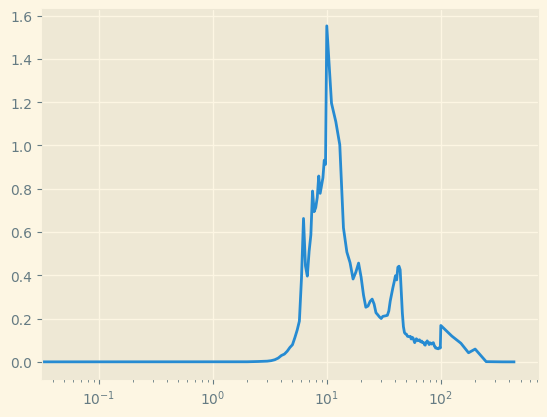

In [101]:
plt.plot(freqAx, psd)
plt.xscale('log')

In [25]:
filename = os.listdir(rootDir)[0]
path = rootDir+filename

In [34]:
path

'/Users/charl/OneDrive/Documents/__water/floOoo/code/data/focus_focus_1674239692.json'

In [146]:
path

'/Users/charl/OneDrive/Documents/__water/floOoo/code/data/rawBrainwaves_rawBrainwaves_1674239692.csv'

In [147]:
with open(path, 'r') as f:
    data = json.load(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [45]:
ks = list(data[0].keys())
kData = {}
for k in ks:
    kData[k] = [datai[k] for datai in data] 

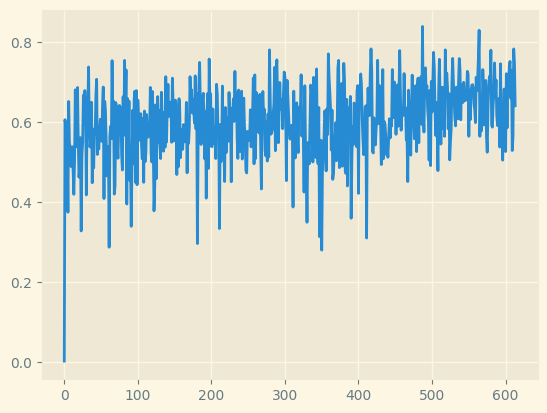

In [56]:
ks
['label', 'metric', 'probability', 'timestamp'][1]

plt.plot(kData['probability'])


In [66]:
filenames = [filename for filename in os.listdir(rootDir) if 'rawBrainwaves' in filename]
filename = filenames[0]

path = rootDir+filename
path

'/Users/charl/OneDrive/Documents/__water/floOoo/code/data/rawBrainwaves_rawBrainwaves_1674239692.csv'

In [67]:
data = pd.read_csv(path)

In [70]:
data.shape

(153488, 10)

In [73]:
data.keys()

Index(['Unnamed: 0', 'unixTimestamp', 'CP3', 'C3', 'F5', 'PO3', 'PO4', 'F6',
       'C4', 'CP4'],
      dtype='object')